In [72]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [73]:
data=pd.read_csv("C:/Users/ASUS/Desktop/MetehanHocaDDO/kaggle sale.csv")

https://www.kaggle.com/datasets/arishmam/sales-data

<Axes: >

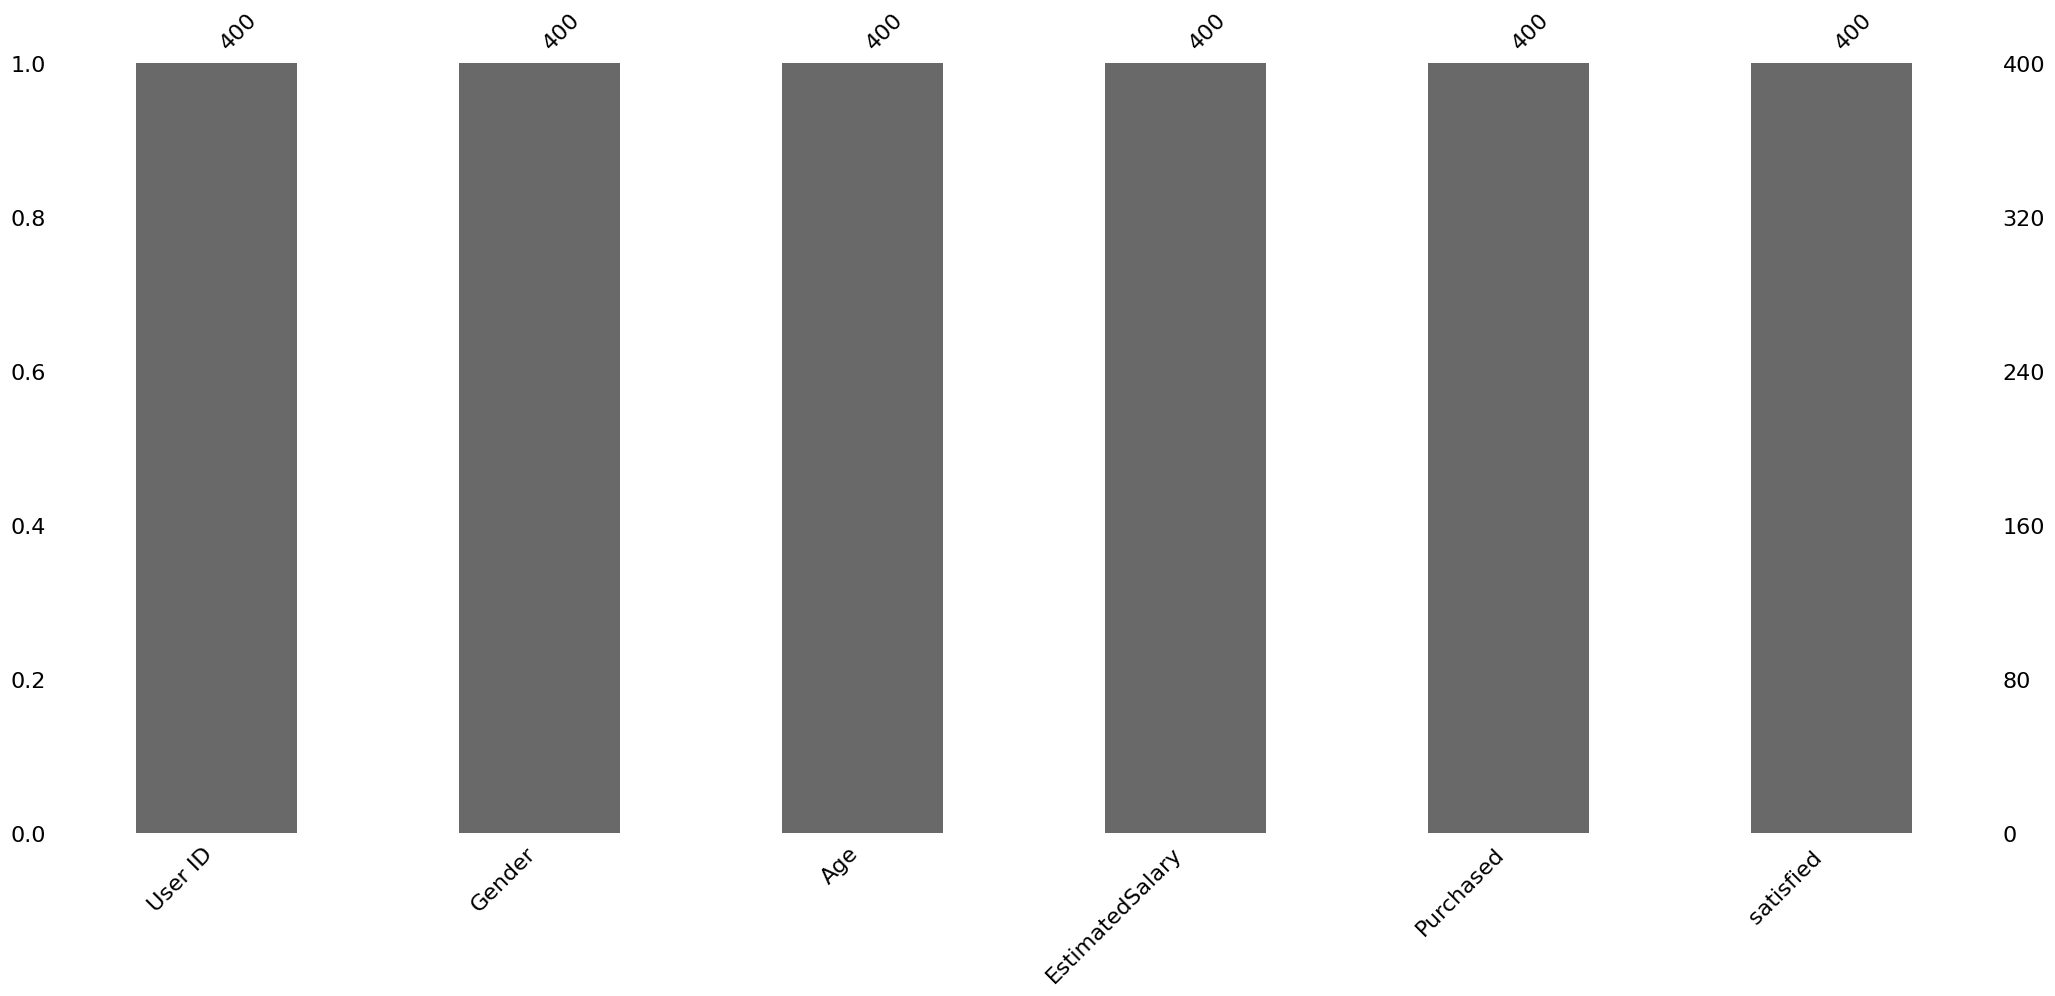

In [74]:
import missingno as msno
msno.bar(data)

In [ ]:
import numpy 
import pandas 
import random 
def introduce_nans(df: pandas.DataFrame,
                   row_ratio: float,
                   ratio: float,
                   border: float = None):
    # Add NaN values to dataframe
    # Ratio_rows: Ratio of rows that will be nanned
    # Ratio: Ratio of the number of nans that will be added to each row
    # Borders: The variance between min and max number of nan for each row

    if border is None:
        border = 0
    for index, row in df.iterrows():
        if random.random() < row_ratio:
            no_of_nans = int((border + ratio) * df.shape[1])
            nan_locs = random.sample(range(0, df.shape[1]), no_of_nans)
            for nan_loc in nan_locs:
                df.at[index, df.columns[nan_loc]] = numpy.nan
    return df

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   satisfied        400 non-null    object
dtypes: int64(4), object(2)
memory usage: 18.9+ KB


In [76]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,satisfied
0,15624510,Male,19,19000,0,no
1,15810944,Male,35,20000,0,no
2,15668575,Female,26,43000,0,no
3,15603246,Female,27,57000,0,no
4,15804002,Male,19,76000,0,no


In [77]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder


In [78]:
ohEnc=OneHotEncoder()
dataEnc=ohEnc.fit_transform(data[["Gender","satisfied "]])
data=pd.concat([data,pd.DataFrame(dataEnc.toarray(),columns=ohEnc.get_feature_names_out().tolist())],axis=1)
data.drop("Gender",axis=1,inplace=True)
data.drop("satisfied ",axis=1,inplace=True)
data.drop("satisfied _no",axis=1,inplace=True)

In [79]:
data.iloc[:,4].unique()

array([0., 1.])

In [80]:
y=data["satisfied _yes"]
X=data.drop("satisfied _yes",axis=1)

In [81]:
y.value_counts()

satisfied _yes
1.0    300
0.0    100
Name: count, dtype: int64

In [82]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: satisfied _yes
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Age              400 non-null    int64  
 2   EstimatedSalary  400 non-null    int64  
 3   Purchased        400 non-null    int64  
 4   Gender_Female    400 non-null    float64
 5   Gender_Male      400 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 18.9 KB


In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [85]:
y.value_counts()

satisfied _yes
0.0    300
1.0    300
Name: count, dtype: int64

In [86]:
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [88]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
kfold=KFold(n_splits=5)
model=GridSearchCV(DecisionTreeClassifier(),refit = True, verbose=2,cv=kfold,param_grid=param_grid,scoring='accuracy').fit(X_train,y_train)
pred=model.predict(X_test)




Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, m

In [89]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix


In [90]:
confusion_matrix(y_test,pred)

array([[52,  8],
       [15, 45]])

In [91]:
print(f"Accuracy: {accuracy_score(y_test,pred)}")
print(f"recall_score: {recall_score(y_test,pred)}")
print(f"precision_score: {precision_score(y_test,pred)}")
print(f"f1_score: {f1_score(y_test,pred)}")

Accuracy: 0.8083333333333333
recall_score: 0.75
precision_score: 0.8490566037735849
f1_score: 0.7964601769911505
